pregnant    0
glucose     0
bp          5
skin        0
insulin     0
bmi         8
pedigree    4
age         0
label       0
dtype: int64


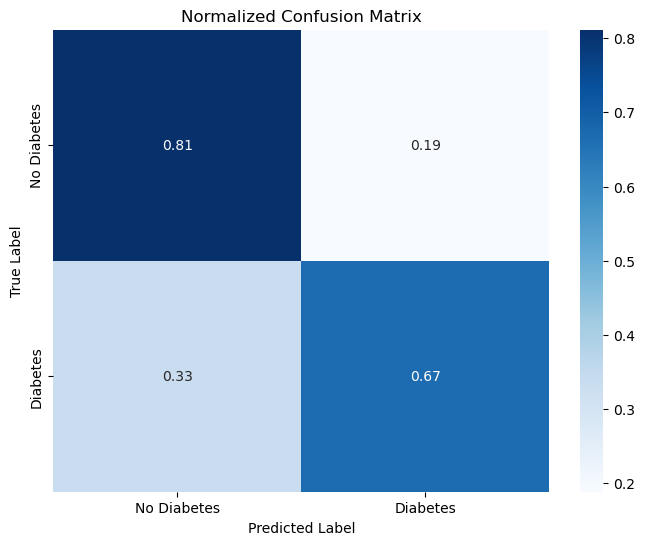

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

# Check for missing values
print(pima.isnull().sum())

# Drop missing values if any
pima.dropna(inplace=True)

# Split dataset into features and target variable
X = pima.drop('label', axis=1)
y = pima['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test_scaled)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalizing the confusion matrix
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', fmt=".2f", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()
